## Learning and Implementing K-Fold 

## Plan:
    Create a basic model(sqft_living vs price) 
    Run an OLS on that data and record data
    Run a train test split and record data
    Run a k-fold test and record data
    Intrpet how much more accurate the K-Fold data was in comparison. 
    

## Importing and cleaning Data

In [1246]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('ggplot')

In [1247]:
df_all = pd.read_csv('kc_house_data.csv')


In [1248]:
df_all['sqft_basement'] = df_all['sqft_basement'].replace("?",0)
df_all.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [1249]:
'''Drop all records in DF where values in Waterfront, View are NaN.
Also Dropping Yr_Ren, Lat, and Long. We have zipcodes so Lat and Long seemed uneccsesary'''
df_all = df_all[~np.isnan(df['waterfront'])]
df_all = df_all[~np.isnan(df['view'])]
df_all = df_all.drop(['yr_renovated','lat','long'], axis=1)
df_all['sqft_basement'] = df_all['sqft_basement'].astype(float)
df_all['zipcode'] = df_all['zipcode'].astype(str)

df_all.head()

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


### Splitting Dataframe into workable pieces

In [1250]:
df_test = df_all[:9000]

In [1251]:
'''Finding the covariance between variables outside of the target value'''

'Finding the covariance between variables outside of the target value'

In [1252]:
# cvar_testdf = df_test.drop(columns=['id','price'])

In [1253]:
# cvar_testdf.corr()

In [1294]:
abs(cvar_testdf.corr()) > 0.70

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,True,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,True,False


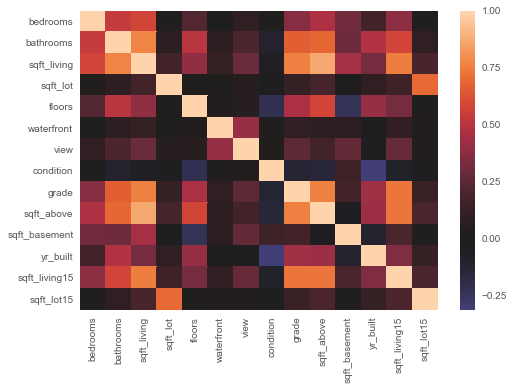

In [1255]:
import seaborn as sns
sns.heatmap(cvar_testdf.corr(), center=0);

In [1256]:
df_test = df_test.drop(columns=['id'])


In [1257]:
df_test.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930


In [1258]:
#df_test

In [1259]:
df_sea = df_test.loc[df_test['yr_built'] > 1975]


In [1261]:
# #seattle_zips = pd.DataFrame(data=['98101', '98102', '98103', '98104', '98105', '98106', '98107', '98108', '98109', '98112', 
#                  '98115', '98116', '98117', '98118', '98119', '98121', '98122', '98125', '98126', '98133', '98134', '98136', '98144', 
#                  '98146', '98154', '98164', '98174', '98177', '98178', '98195', '98199'],
#                         columns=['zipcode'])

# #seattle_zips.head()

In [1262]:
#sum(df_test['zipcode'].isin(seattle_zips['zipcode']))

In [1263]:
#seattle_df = pd.merge(df_test, seattle_zips, how='inner', on='zipcode')

In [1264]:
#seattle_df.info()

In [1265]:
'''Create log of price'''
df_sea_clean = df_sea[:1200]
seaclean = df_sea_clean



In [1266]:
seaclean['price']
seaclean.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,98003,2238,6819
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,98038,2390,7570
13,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,4,7,1370,0.0,1977,98074,1370,10208


In [1268]:
log_prices = seaclean['price']


In [1269]:
log_price = np.log(df_test['price'])

In [1270]:
df_ols = df_test[['price', 'bedrooms', 'waterfront', 'view', 'grade', 'yr_built']]

In [1271]:
df_ols['log_price'] = log_price
#df_ols=df_ols.drop(columns=['price'])
#print(df_ols)

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1272]:
df_ols.drop(columns=['log_price'])
df_ols1 = df_ols.drop(columns=['log_price'])

In [1273]:
'''NEW DATA FROM WITH LOGS'''

log_sqftliving = np.log(df_test['sqft_living'])
log_bedrooms = np.log(df_test['bedrooms'])
log_yr_built = np.log(df_test['yr_built'])


In [1274]:
df_logs = pd.DataFrame([])
df_logs['log_sqft'] = log_sqftliving
df_logs['log_bedrooms'] = log_bedrooms
df_logs['log_yr_built'] = log_yr_built
df_logs['waterfront'] = df_test['waterfront']
df_logs['grade'] = df_test['grade']
df_logs['view'] = df_test['view']
df_logs['bathrooms'] = df_test['bathrooms']

In [1276]:
'''adding log prices to seaclean and seattle_df'''

seaclean['log_sqft'] = np.log(seaclean['sqft_living'])
seaclean['log_bedrooms'] = np.log(seaclean['bedrooms'])
seaclean.head()

# seattle_df['log_sqft'] = np.log(seattle_df['sqft_living'])
# seattle_df['log_bedrooms'] = np.log(seattle_df['bedrooms'])
# seattle_df.head()

/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,log_sqft,log_bedrooms
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503,7.426549,1.098612
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,98053,4760,101930,8.597851,1.386294
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,0.0,1995,98003,2238,6819,7.447168,1.098612
9,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,98038,2390,7570,7.544332,1.098612
13,10/7/2014,400000.0,3,1.75,1370,9680,1.0,0.0,0.0,4,7,1370,0.0,1977,98074,1370,10208,7.222566,1.098612


# OLS MODEL
### Standard Linear Regression Model with Stats Models

In [1277]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [1278]:
#f = 'price~ bedrooms + grade + yr_built'

In [1279]:
# ols_model = ols(formula=f, data=dftest3).fit()
# ols_model.summary()

In [1280]:
#ols_model.params

# SKLearn Linear Regression Method
## Experimenting with Linear Regression


In [1291]:
import sklearn
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [1292]:
'''This is a linear regression a train split test of sqft_living against log_price, and then the intercept and coef 
were reverted back out of log values into interpretable data.'''

feature_col = ['log_sqft', 'grade']
X = seaclean[feature_col]
y = log_prices

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.5)

linreg1 = LinearRegression()
results = linreg1.fit(X_train, y_train)

print(np.exp(linreg1.intercept_))
#result = (np.exp(linreg1.coef_))
#zip(feature_cols, linreg1.coef_)

0.0


In [1293]:
print (X_train.shape, y_train.shape)
standardy= np.exp(y_test)


(600, 2) (600,)


In [1286]:
predictions = linreg1.predict(X_test)
predictions[0:5]
standard = np.exp(predictions)

## Calculating the RMSE of the function - SQ ROOT ( sum(Y(real) - Y(predicted) **2)

In [1287]:
(standard - standardy).mean()

print(np.sqrt(sum((standardy - standard) ** 2) / len(standardy)))

nan


Text(0, 0.5, 'Predictions')

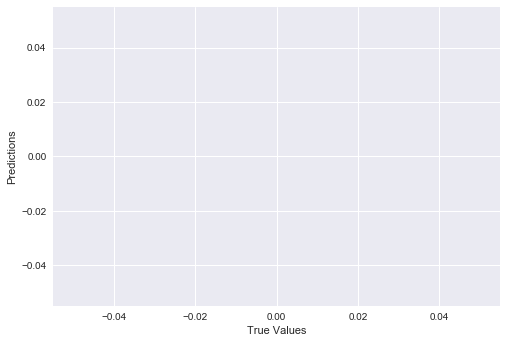

In [1288]:
plt.scatter(standardy, standard)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [1289]:
print('Score', linreg1.score(X_test, y_test))

Score 0.49714260138765254


In [1290]:
scores = cross_val_score(linreg1, X, y, cv=5)
print('Cross Validated Scores', scores)

Cross Validated Scores [0.55088107 0.58444369 0.41259666 0.53089479 0.53714193]


## Attempting something

In [1297]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

feature_col = ['log_sqft','log_bedrooms', 'grade']

X = seaclean[feature_col]
y = log_prices

X_train, X_test, y_train, y_test = train_test_split(X,y)

linreg1 = LinearRegression()
linreg2 = LinearRegression()
selector = RFE(linreg2, n_features_to_select = 2)
selector = selector.fit(feature_col, seaclean['price'])
selector.support
selector.ranking

#estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)
#results = linreg1.fit(X_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=['log_sqft' 'log_bedrooms' 'grade'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.